In [27]:
import tensorflow
from tensorflow import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

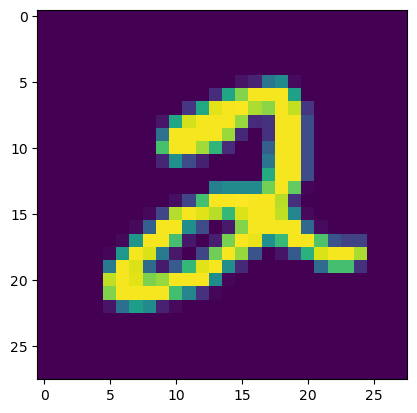

In [5]:
plt.imshow(X_train[5])

In [6]:
X_train=X_train/255
X_test=X_test/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(700,activation="relu"))
model.add(Dense(650,activation="relu"))
#model.add(Dense(600,activation="relu"))
#model.add(Dense(550,activation="relu"))
#model.add(Dense(500,activation="relu"))
#model.add(Dense(450,activation="relu"))
#model.add(Dense(400,activation="relu"))
#model.add(Dense(350,activation="relu"))
#model.add(Dense(300,activation="relu"))
#model.add(Dense(250,activation="relu"))
#model.add(Dense(200,activation="relu"))
#model.add(Dense(150,activation="relu"))
#model.add(Dense(100,activation="relu"))
#model.add(Dense(50,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 700)               549500    
                                                                 
 dense_1 (Dense)             (None, 650)               455650    
                                                                 
 dense_2 (Dense)             (None, 10)                6510      
                                                                 
Total params: 1,011,660
Trainable params: 1,011,660
Non-trainable params: 0
_________________________________________________________________


In [10]:
res=model.compile(loss='sparse_categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

In [11]:
res= model.fit(X_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1994 - accuracy: 0.9388 - val_loss: 0.1155 - val_accuracy: 0.9636
Epoch 2/5
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0847 - accuracy: 0.9742 - val_loss: 0.1000 - val_accuracy: 0.9711
Epoch 3/5
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0587 - accuracy: 0.9812 - val_loss: 0.0950 - val_accuracy: 0.9744
Epoch 4/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0433 - accuracy: 0.9864 - val_loss: 0.1130 - val_accuracy: 0.9726
Epoch 5/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0406 - accuracy: 0.9871 - val_loss: 0.0947 - val_accuracy: 0.9767


In [12]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [13]:
y_pred=y_prob.argmax(axis=1)

In [14]:
accuracy_score(y_test,y_pred)

0.9766

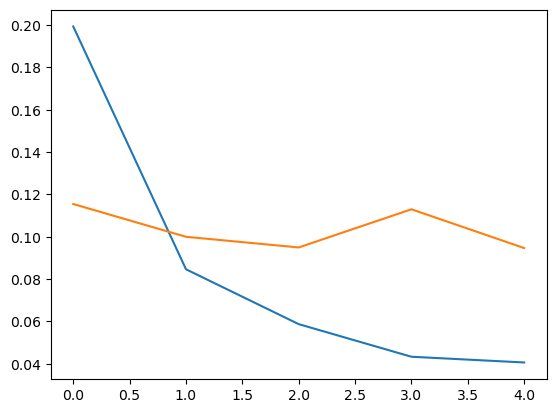

In [15]:
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])

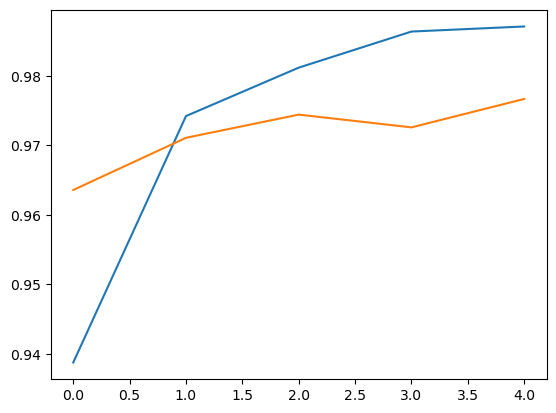

In [16]:
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])

In [19]:
# Expanding dimension
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [20]:
X_train.shape

(60000, 28, 28, 1)

In [21]:
# One Hot Encoding
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [22]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [24]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [34]:
e=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=4,verbose=1)
m=ModelCheckpoint("./bestmodel.h5",monitor="val_accuracy",verbose=1,save_best_only=True)
c=[e,m]

In [35]:
his=model.fit(X_train,y_train,epochs=5,validation_split=0.3,callbacks=c)

Epoch 1/5
1311/1313 [============================>.] - ETA: 0s - loss: 0.0129 - accuracy: 0.9950
Epoch 1: val_accuracy improved from -inf to 0.98950, saving model to .\bestmodel.h5
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0129 - accuracy: 0.9950 - val_loss: 0.0449 - val_accuracy: 0.9895
Epoch 2/5
1311/1313 [============================>.] - ETA: 0s - loss: 0.0113 - accuracy: 0.9963
Epoch 2: val_accuracy did not improve from 0.98950
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.0482 - val_accuracy: 0.9894
Epoch 3/5
1313/1313 [==============================] - ETA: 0s - loss: 0.0114 - accuracy: 0.9960
Epoch 3: val_accuracy improved from 0.98950 to 0.99111, saving model to .\bestmodel.h5
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0114 - accuracy: 0.9960 - val_loss: 0.0420 - val_accuracy: 0.9911
Epoch 4/5
1310/1313 [============================>.] - ETA: 0s - loss: 0.0094 - ac

In [36]:
model_S=keras.models.load_model("bestmodel.h5")

In [38]:
score=model_S.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0331 - accuracy: 0.9918


In [39]:
score

[0.033087100833654404, 0.9918000102043152]

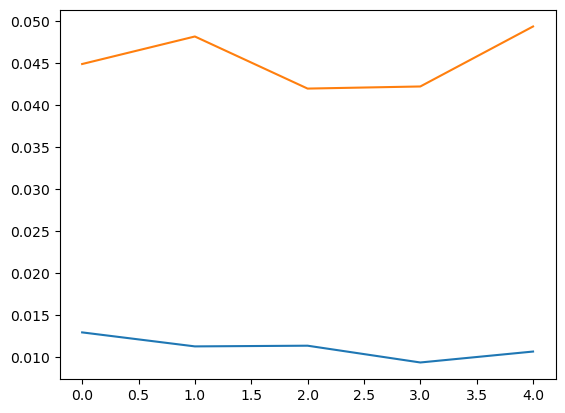

In [41]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])

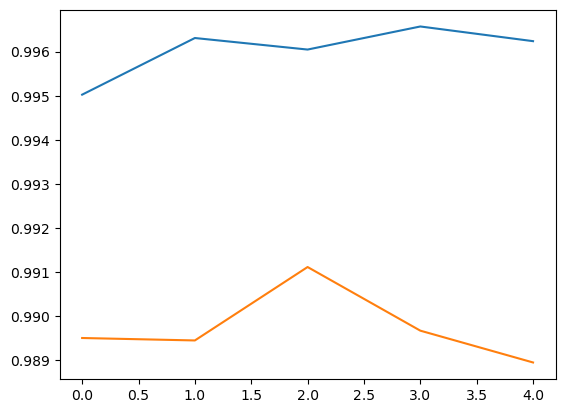

In [40]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])